In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [86]:
df = pd.read_csv('ufc_fights_4yrs.csv')

In [87]:
df["date"] = pd.to_datetime(df["date"])

In [88]:
df.sort_values(by=['date'], ascending=False, inplace=True)
df = df.reset_index(drop=True)

In [89]:
df.head()

date                           event                location  result  \
0 2023-12-16  UFC 296: Edwards vs. Covington  Las Vegas, Nevada, USA       1   
1 2023-12-16  UFC 296: Edwards vs. Covington  Las Vegas, Nevada, USA       1   
2 2023-12-16  UFC 296: Edwards vs. Covington  Las Vegas, Nevada, USA       0   
3 2023-12-16  UFC 296: Edwards vs. Covington  Las Vegas, Nevada, USA       1   
4 2023-12-16  UFC 296: Edwards vs. Covington  Las Vegas, Nevada, USA       0   

           fighter1       fighter2     method_of_victory  fight_duration  \
0  Alonzo Menifield  Dustin Jacoby  Decision - Unanimous             900   
1      Irene Aldana     Karol Rosa  Decision - Unanimous             900   
2      Martin Buday  Shamil Gaziev                KO/TKO             356   
3   Tagir Ulanbekov    Cody Durden            Submission             565   
4     Casey O'Neill  Ariane Lipski            Submission             378   

   fight_format  f1_knockdown  ...  f1_takedown_land  f2_takedown_land  \
0             3             1  ...                 1                 0   
1             3             0  ...                 0                 0   
2             3             0  ...                 0                 0   
3             3             1  ...                 2                 0   
4             3             0  ...                 0                 1   

   f1_takedown_att  f2_takedown_att  f1_sub_att  f2_sub_att  f1_reversal  \
0                2                0           0           0            0   
1                0                1           0           0            0   
2                2                0           0           0            0   
3                2                0           5           0            1   
4                2                1           0           1            0   

   f2_reversal  f1_control_time  f2_control_time  
0            0              123              128  
1            0                0                0  
2            0               20              138  
3            0              363               36  
4            0               20               58  

[5 rows x 29 columns]

In [90]:
fighter_names = pd.concat([df['fighter1'], df['fighter2']])

# # Create a mapping of unique fighter names to unique identifiers
unique_fighters = fighter_names.unique()
fighter_id_map = {fighter: idx for idx, fighter in enumerate(unique_fighters)}

# Map fighter names in 'fighter1' and 'fighter2' columns to their respective identifiers
df['fighter1_id'] = df['fighter1'].map(fighter_id_map)
df['fighter2_id'] = df['fighter2'].map(fighter_id_map)

# # Display the mapping of fighter names to their corresponding identifiers
print("Fighter Name to ID Mapping:")
for fighter, fighter_id in fighter_id_map.items():
    print(f"{fighter}: {fighter_id}")

Fighter Name to ID Mapping:
Alonzo Menifield: 0
Irene Aldana: 1
Martin Buday: 2
Tagir Ulanbekov: 3
Casey O'Neill: 4
Cody Garbrandt: 5
Andre Fili: 6
Alexandre Pantoja: 7
Josh Emmett: 8
Tony Ferguson: 9
Leon Edwards: 10
Shavkat Rakhmonov: 11
Nasrat Haqparast: 12
Rayanne Amanda: 13
JunYong Park: 14
Song Kenan: 15
Luana Santos: 16
Song Yadong: 17
Anthony Smith: 18
Tim Elliott: 19
Steve Garcia: 20
Tatsuro Taira: 21
HyunSung Park: 22
Beneil Dariush: 23
Jalin Turner: 24
Wellington Turman: 25
Rodolfo Bellato: 26
Veronica Hardy: 27
Miesha Tate: 28
Drakkar Klose: 29
Rob Font: 30
Clay Guida: 31
Sean Brady: 32
Punahele Soriano: 33
Zach Reese: 34
Lucie Pudilova: 35
Jonathan Pearce: 36
Christian Leroy Duncan: 37
Chad Anheliger: 38
Luana Pinheiro: 39
Jeka Saragih: 40
Michael Morales: 41
Uros Medic: 42
Mick Parkin: 43
Chase Hooper: 44
Payton Talbott: 45
Charles Johnson: 46
Brendan Allen: 47
Trey Ogden: 48
Nazim Sadykhov: 49
Dennis Buzukja: 50
Steve Erceg: 51
Jiri Prochazka: 52
Tabatha Ricci: 53
John C

In [91]:
df.head()

date                           event                location  result  \
0 2023-12-16  UFC 296: Edwards vs. Covington  Las Vegas, Nevada, USA       1   
1 2023-12-16  UFC 296: Edwards vs. Covington  Las Vegas, Nevada, USA       1   
2 2023-12-16  UFC 296: Edwards vs. Covington  Las Vegas, Nevada, USA       0   
3 2023-12-16  UFC 296: Edwards vs. Covington  Las Vegas, Nevada, USA       1   
4 2023-12-16  UFC 296: Edwards vs. Covington  Las Vegas, Nevada, USA       0   

           fighter1       fighter2     method_of_victory  fight_duration  \
0  Alonzo Menifield  Dustin Jacoby  Decision - Unanimous             900   
1      Irene Aldana     Karol Rosa  Decision - Unanimous             900   
2      Martin Buday  Shamil Gaziev                KO/TKO             356   
3   Tagir Ulanbekov    Cody Durden            Submission             565   
4     Casey O'Neill  Ariane Lipski            Submission             378   

   fight_format  f1_knockdown  ...  f1_takedown_att  f2_takedown_att  \
0             3             1  ...                2                0   
1             3             0  ...                0                1   
2             3             0  ...                2                0   
3             3             1  ...                2                0   
4             3             0  ...                2                1   

   f1_sub_att  f2_sub_att  f1_reversal  f2_reversal  f1_control_time  \
0           0           0            0            0              123   
1           0           0            0            0                0   
2           0           0            0            0               20   
3           5           0            1            0              363   
4           0           1            0            0               20   

   f2_control_time  fighter1_id  fighter2_id  
0              128            0          183  
1                0            1          315  
2              138            2          761  
3               36            3          189  
4               58            4          242  

[5 rows x 31 columns]

In [92]:
df.columns

Index(['date', 'event', 'location', 'result', 'fighter1', 'fighter2',
       'method_of_victory', 'fight_duration', 'fight_format', 'f1_knockdown',
       'f2_knockdown', 'f1_sig_strike_land', 'f2_sig_strike_land',
       'f1_sig_strike_att', 'f2_sig_strike_att', 'f1_total_strike_land',
       'f2_total_strike_land', 'f1_total_strike_att', 'f2_total_strike_att',
       'f1_takedown_land', 'f2_takedown_land', 'f1_takedown_att',
       'f2_takedown_att', 'f1_sub_att', 'f2_sub_att', 'f1_reversal',
       'f2_reversal', 'f1_control_time', 'f2_control_time', 'fighter1_id',
       'fighter2_id'],
      dtype='object')

In [118]:
X = df[df.columns[9:]]
y = df['fight_duration']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression(max_iter=1000)  # You can adjust hyperparameters as needed

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.3875
Classification Report:
              precision    recall  f1-score   support

          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         0
          20       0.00      0.00      0.00         0
          23       0.00      0.00      0.00         2
          26       0.00      0.00      0.00         0
          31       0.00      0.00      0.00         0
          32       0.00      0.00      0.00         0
          33       0.00      0.00      0.00         1
          39       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         1
          44       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         0
          47       0.00      0.00      0.00         0
          48       0.00      0.00      0.00         1
          49       0.00      0.00      0.00         0
          54       0.00      0.00      0.00         1
          56       0.00      0.00      0.

C:\Users\ay3xqa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ay3xqa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ay3xqa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in l

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Predict fight durations for test data
predicted_durations = regression_model.predict(X_test)
# upper_bound_3_rounds = 900
# upper_bound_5_rounds = 1500
# import numpy as np
# for i in range(len(predicted_durations)):
#     if X_test.iloc[i]['fight_format'] == 3 and predicted_durations[i] > upper_bound_3_rounds:
#         predicted_durations[i] = upper_bound_3_rounds
#     elif X_test.iloc[i]['fight_format'] == 5 and predicted_durations[i] > upper_bound_5_rounds:
#         predicted_durations[i] = upper_bound_5_rounds

# # Using numpy for more efficient clipping
# predicted_durations_clipped = np.where(X_test['fight_format'] == 3, np.minimum(predicted_durations, upper_bound_3_rounds), np.minimum(predicted_durations, upper_bound_5_rounds))

In [121]:
# Evaluate the model
mse = mean_squared_error(y_test, predicted_durations)
r2 = r2_score(y_test, predicted_durations)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 19123.913322472814
R-squared: 0.8569259137681241


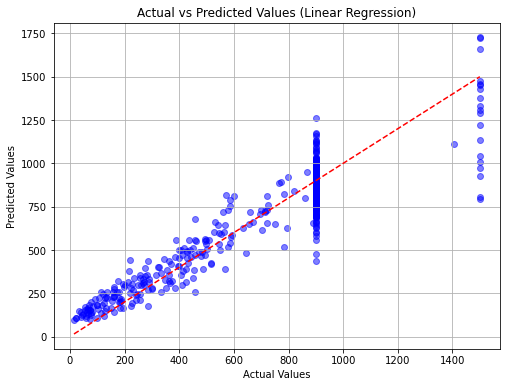

In [122]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predicted_durations, color='blue', alpha=0.5)
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Diagonal line for reference
plt.grid(True)
plt.show()

In [123]:
coefficients = regression_model.coef_
feature_names = X_train.columns  # Assuming X_train is a DataFrame

# Create a DataFrame to store coefficients with their corresponding feature names
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the features by absolute coefficient values to find the most important features
feature_importance['Absolute_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute_Coefficient', ascending=False)

# Display the most important features
print(feature_importance)

                 Feature  Coefficient  Absolute_Coefficient
17           f2_reversal   -14.203073             14.203073
14            f1_sub_att   -10.821243             10.821243
11      f2_takedown_land    -9.379288              9.379288
13       f2_takedown_att     9.045226              9.045226
0           f1_knockdown    -7.859945              7.859945
23        fighter2_past3     6.832578              6.832578
22        fighter1_past3     6.716989              6.716989
12       f1_takedown_att     6.026508              6.026508
4      f1_sig_strike_att     5.130222              5.130222
2     f1_sig_strike_land    -4.683448              4.683448
10      f1_takedown_land    -4.575030              4.575030
16           f1_reversal    -4.531835              4.531835
6   f1_total_strike_land     3.498400              3.498400
15            f2_sub_att    -3.414357              3.414357
5      f2_sig_strike_att     3.314728              3.314728
8    f1_total_strike_att    -2.849202   

In [53]:
df.head(30)

date                                   event  \
55   2023-12-16          UFC 296: Edwards vs. Covington   
56   2023-12-16          UFC 296: Edwards vs. Covington   
13   2023-12-16          UFC 296: Edwards vs. Covington   
12   2023-12-16          UFC 296: Edwards vs. Covington   
50   2023-12-16          UFC 296: Edwards vs. Covington   
54   2023-12-16          UFC 296: Edwards vs. Covington   
16   2023-12-16          UFC 296: Edwards vs. Covington   
57   2023-12-16          UFC 296: Edwards vs. Covington   
58   2023-12-16          UFC 296: Edwards vs. Covington   
59   2023-12-16          UFC 296: Edwards vs. Covington   
60   2023-12-16          UFC 296: Edwards vs. Covington   
62   2023-12-16          UFC 296: Edwards vs. Covington   
1845 2023-12-09     UFC Fight Night: Song vs. Gutierrez   
1841 2023-12-09     UFC Fight Night: Song vs. Gutierrez   
1843 2023-12-09     UFC Fight Night: Song vs. Gutierrez   
1844 2023-12-09     UFC Fight Night: Song vs. Gutierrez   
1842 2023-12-09     UFC Fight Night: Song vs. Gutierrez   
1849 2023-12-09     UFC Fight Night: Song vs. Gutierrez   
1846 2023-12-09     UFC Fight Night: Song vs. Gutierrez   
1848 2023-12-09     UFC Fight Night: Song vs. Gutierrez   
1838 2023-12-09     UFC Fight Night: Song vs. Gutierrez   
1839 2023-12-09     UFC Fight Night: Song vs. Gutierrez   
1840 2023-12-09     UFC Fight Night: Song vs. Gutierrez   
1864 2023-12-02  UFC Fight Night: Dariush vs. Tsarukyan   
1867 2023-12-02  UFC Fight Night: Dariush vs. Tsarukyan   
1857 2023-12-02  UFC Fight Night: Dariush vs. Tsarukyan   
1858 2023-12-02  UFC Fight Night: Dariush vs. Tsarukyan   
1859 2023-12-02  UFC Fight Night: Dariush vs. Tsarukyan   
1860 2023-12-02  UFC Fight Night: Dariush vs. Tsarukyan   
1861 2023-12-02  UFC Fight Night: Dariush vs. Tsarukyan   

                    location  result           fighter1             fighter2  \
55    Las Vegas, Nevada, USA       1   Alonzo Menifield        Dustin Jacoby   
56    Las Vegas, Nevada, USA       1       Irene Aldana           Karol Rosa   
13    Las Vegas, Nevada, USA       0       Martin Buday        Shamil Gaziev   
12    Las Vegas, Nevada, USA       1    Tagir Ulanbekov          Cody Durden   
50    Las Vegas, Nevada, USA       0      Casey O'Neill        Ariane Lipski   
54    Las Vegas, Nevada, USA       1     Cody Garbrandt       Brian Kelleher   
16    Las Vegas, Nevada, USA       1         Andre Fili        Lucas Almeida   
57    Las Vegas, Nevada, USA       1  Alexandre Pantoja       Brandon Royval   
58    Las Vegas, Nevada, USA       1        Josh Emmett       Bryce Mitchell   
59    Las Vegas, Nevada, USA       0      Tony Ferguson       Paddy Pimblett   
60    Las Vegas, Nevada, USA       1       Leon Edwards      Colby Covington   
62    Las Vegas, Nevada, USA       1  Shavkat Rakhmonov     Stephen Thompson   
1845  Las Vegas, Nevada, USA       1   Nasrat Haqparast      Jamie Mullarkey   
1841  Las Vegas, Nevada, USA       0     Rayanne Amanda       Talita Alencar   
1843  Las Vegas, Nevada, USA       0       JunYong Park          Andre Muniz   
1844  Las Vegas, Nevada, USA       0         Song Kenan        Kevin Jousset   
1842  Las Vegas, Nevada, USA       1       Luana Santos      Stephanie Egger   
1849  Las Vegas, Nevada, USA       1        Song Yadong      Chris Gutierrez   
1846  Las Vegas, Nevada, USA       0      Anthony Smith  Khalil Rountree Jr.   
1848  Las Vegas, Nevada, USA       1        Tim Elliott           Sumudaerji   
1838  Las Vegas, Nevada, USA       1       Steve Garcia     Melquizael Costa   
1839  Las Vegas, Nevada, USA       1      Tatsuro Taira     Carlos Hernandez   
1840  Las Vegas, Nevada, USA       1      HyunSung Park         Shannon Ross   
1864      Austin, Texas, USA       0     Beneil Dariush      Arman Tsarukyan   
1867      Austin, Texas, USA       1       Jalin Turner          Bobby Green   
1857      Austin, Texas, USA       0  Wellington Turman         Jared Gooden   
1858      Austin, Tex

In [97]:
# Function to calculate past 3 fight results for each fighter at that time
def calculate_past3(row, df):
    fighter1 = row['fighter1']
    fighter2 = row['fighter2']
    
    # Get the index of the current row
    current_index = row.name
    
    # Filter the DataFrame for fights prior to the current row
    past_fights = df.iloc[current_index+1:]
    
    # Filter past fights for each fighter's past 3 fights
    past_fights_fighter1 = past_fights[((past_fights['fighter1'] == fighter1) | (past_fights['fighter2'] == fighter1))].head(3)
    past_fights_fighter2 = past_fights[((past_fights['fighter1'] == fighter2) | (past_fights['fighter2'] == fighter2))].head(3)
    
    # Calculate wins and losses for fighter1 regardless of their position
    fighter1_wins = (((past_fights_fighter1['fighter1'] == fighter1) & (past_fights_fighter1['result'] == 1)) |
                     ((past_fights_fighter1['fighter2'] == fighter1) & (past_fights_fighter1['result'] == 0))).sum()
    
    fighter1_losses = (((past_fights_fighter1['fighter1'] == fighter1) & (past_fights_fighter1['result'] == 0)) |
                       ((past_fights_fighter1['fighter2'] == fighter1) & (past_fights_fighter1['result'] == 1))).sum()
    
    # Calculate wins and losses for fighter2 regardless of their position
    fighter2_wins = (((past_fights_fighter2['fighter1'] == fighter2) & (past_fights_fighter2['result'] == 1)) |
                     ((past_fights_fighter2['fighter2'] == fighter2) & (past_fights_fighter2['result'] == 0))).sum()
    
    fighter2_losses = (((past_fights_fighter2['fighter1'] == fighter2) & (past_fights_fighter2['result'] == 0)) |
                       ((past_fights_fighter2['fighter2'] == fighter2) & (past_fights_fighter2['result'] == 1))).sum()
    
    # Return sum of wins and losses for each fighter
    return pd.Series({
        'fighter1_past3': fighter1_wins - fighter1_losses,
        'fighter2_past3': fighter2_wins - fighter2_losses
    })

# Apply the function row-wise to calculate past 3 fight results at each time point
df[['fighter1_past3', 'fighter2_past3']] = df.apply(lambda row: calculate_past3(row, df), axis=1)

# Display the DataFrame with past 3 fight results at each time point


In [126]:
df[(df['fighter1'] == 'Mayra Bueno Silva') | (df['fighter2'] == 'Mayra Bueno Silva')]


date                                     event  \
232  2023-07-15     UFC Fight Night: Holm vs. Bueno Silva   
464  2023-02-18  UFC Fight Night: Andrade vs. Blanchfield   
709  2022-08-06          UFC Fight Night: Santos vs. Hill   
893  2022-04-16       UFC Fight Night: Luque vs. Muhammad   
1140 2021-10-16          UFC Fight Night: Ladd vs. Dumont   
1466 2021-02-27     UFC Fight Night: Rozenstruik vs. Gane   
1684 2020-09-19    UFC Fight Night: Covington vs. Woodley   
1903 2020-03-14         UFC Fight Night: Lee vs. Oliveira   

                                location  result            fighter1  \
232               Las Vegas, Nevada, USA       0          Holly Holm   
464               Las Vegas, Nevada, USA       0       Lina Lansberg   
709               Las Vegas, Nevada, USA       1   Mayra Bueno Silva   
893               Las Vegas, Nevada, USA       1   Mayra Bueno Silva   
1140              Las Vegas, Nevada, USA       1        Manon Fiorot   
1466              Las Vegas, Nevada, USA       0  Montana De La Rosa   
1684              Las Vegas, Nevada, USA       1   Mayra Bueno Silva   
1903  Brasilia, Distrito Federal, Brazil       0   Mayra Bueno Silva   

                 fighter2     method_of_victory  fight_duration  fight_format  \
232     Mayra Bueno Silva            Overturned             338             5   
464     Mayra Bueno Silva            Submission             585             3   
709       Stephanie Egger            Submission              77             3   
893              Wu Yanan  Decision - Unanimous             900             3   
1140    Mayra Bueno Silva  Decision - Unanimous             900             3   
1466    Mayra Bueno Silva   Decision - Majority             900             3   
1684  Mara Romero Borella            Submission             149             3   
1903         Maryna Moroz  Decision - Unanimous             900             3   

      f1_knockdown  ...  f1_sub_att  f2_sub_att  f1_reversal  f2_reversal  \
232              0  ...           0           1            0            0   
464              0  ...           0           1            1            0   
709              0  ...           1           0            0            0   
893              0  ...           2           0            0            0   
1140             0  ...           0           0            0            0   
1466             0  ...           0           1            0            0   
1684             0  ...           1           0            0            0   
1903             0  ...           0           0            0            0   

      f1_control_time  f2_control_time  fighter1_id  fighter2_id  \
232               185                0          217          485   
464                21              309          380          485   
709                 0               44          485          311   
893                49              135          485          474   
1140              245                4          147          485   
1466              552               64           96          485   
1684                0              120          485          949   
1903               45              269          485          562   

      fighter1_past3  fighter2_past3  
232                1               3  
464               -3               1  
709                1               1  
893                1              -1  
1140               2               1  
1466               0               0  
1684              -1              -2  
1903               0               0  

[8 rows x 33 columns]

In [116]:
X_train.columns

Index(['fight_format', 'f1_knockdown', 'f2_knockdown', 'f1_sig_strike_land',
       'f2_sig_strike_land', 'f1_sig_strike_att', 'f2_sig_strike_att',
       'f1_total_strike_land', 'f2_total_strike_land', 'f1_total_strike_att',
       'f2_total_strike_att', 'f1_takedown_land', 'f2_takedown_land',
       'f1_takedown_att', 'f2_takedown_att', 'f1_sub_att', 'f2_sub_att',
       'f1_reversal', 'f2_reversal', 'f1_control_time', 'f2_control_time',
       'fighter1_id', 'fighter2_id', 'fighter1_past3', 'fighter2_past3'],
      dtype='object')

In [ ]:
#features to clean
#location - location to altitude map
#encode method of victory to an integer map
#fighrter specific stats - age and reach

In [128]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [133]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X contains your features and y contains the target variable (fight_duration)
# Replace this line with your dataset's column names if needed
feature_names = X.columns.tolist()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost regressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Fit the model on the training data
xgb_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb_regressor.predict(X_test)

# Calculate R-squared (coefficient of determination)
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Get feature importance with corresponding feature names
feature_importance = xgb_regressor.feature_importances_

# Create a DataFrame to store feature names and their importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature names and their importance
print("Feature Importance:")
for idx, row in feature_importance_df.iterrows():
    print(f"{row['Feature']}: {row['Importance']}")


R-squared: 0.8263857638911609
Mean Squared Error: 23206.044437088665
Feature Importance:
f1_total_strike_att: 0.6495777368545532
f2_total_strike_att: 0.12678472697734833
f1_control_time: 0.033986326307058334
f2_total_strike_land: 0.030567292124032974
f2_control_time: 0.025776538997888565
f2_takedown_att: 0.020289935171604156
f1_total_strike_land: 0.014724438078701496
f1_takedown_att: 0.013698402792215347
fighter1_past3: 0.012355923652648926
fighter2_past3: 0.010116533376276493
f2_sig_strike_att: 0.008542952127754688
f2_knockdown: 0.007479981519281864
fighter1_id: 0.005861109122633934
f2_sig_strike_land: 0.005831411108374596
fighter2_id: 0.005570983048528433
f1_sig_strike_att: 0.005211990792304277
f1_takedown_land: 0.004448610357940197
f2_sub_att: 0.0042998651042580605
f1_knockdown: 0.0037205442786216736
f1_sub_att: 0.00318096112459898
f1_sig_strike_land: 0.0029140489641577005
f2_takedown_land: 0.002571761142462492
f1_reversal: 0.0019385257037356496
f2_reversal: 0.0005494439974427223
